# Data importing

In [1]:
from google.colab import drive 

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('/content/drive/MyDrive/[Data for Good] Social Media Datathon Challenge/tweets_all_revised2.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning and preparation

In [5]:
df.head()

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
0,0,885747516,2021-02-26 17:59:51,AIMkitchener,🍅 What will your garden look like this year? 🪴...,['https://t.co/g1djW5JMVT'],2.0,0.0,https://twitter.com/i/web/status/1365360946378...,[],False,False,False,False,Adults In Motion,What will your garden look like this year \n...
1,1,885747516,2021-02-24 19:34:45,AIMkitchener,"Virtual connecting is not the next big thing, ...",['https://t.co/b1Ts6V60hS'],1.0,0.0,https://twitter.com/i/web/status/1364660054046...,[],False,False,False,False,Adults In Motion,Virtual connecting is not the next big thing i...
2,2,885747516,2021-02-15 18:14:22,AIMkitchener,“Treat your friends like family and your famil...,['https://t.co/jpFQ3K5oSK'],1.0,0.0,https://twitter.com/i/web/status/1361378331254...,[],False,False,False,False,Adults In Motion,“Treat your friends like family and your famil...
3,3,885747516,2021-02-01 17:54:56,AIMkitchener,🤗 Sending virtual Love Squeezes to anyone who ...,['https://t.co/zk4ZZm0cZa'],1.0,0.0,https://twitter.com/i/web/status/1356300010737...,"['VirtualHug', 'SpreadKindness', 'SpreadLove']",False,False,False,False,Adults In Motion,Sending virtual Love Squeezes to anyone who n...
4,4,885747516,2021-01-15 18:40:36,AIMkitchener,How are YOU getting active and outdoors?! Tell...,['https://t.co/eZB1kEPYUz'],1.0,0.0,NaN,[],True,False,False,False,Adults In Motion,How are YOU getting active and outdoors Tell u...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184743 entries, 0 to 184742
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tweet_id           184743 non-null  int64  
 1   user_id            184743 non-null  int64  
 2   created_at         184743 non-null  object 
 3   screen_name        184743 non-null  object 
 4   text               184743 non-null  object 
 5   urls               184741 non-null  object 
 6   favorite_count     184741 non-null  float64
 7   retweet_count      184741 non-null  float64
 8   URL                105515 non-null  object 
 9   hashtags           184741 non-null  object 
 10  has_media          184741 non-null  object 
 11  is_quote           184741 non-null  object 
 12  is_reply           184741 non-null  object 
 13  is_retweet         184741 non-null  object 
 14  Organization Name  184741 non-null  object 
 15  text_clean         183282 non-null  object 
dtypes:

In [7]:
df.describe()

,tweet_id,user_id,favorite_count,retweet_count
count,184743.000000,1.847430e+05,184741.000000,1.847410e+05
mean,92374.066812,2.609523e+16,1.721989,8.308097e+01
std,53332.082297,1.536217e+17,4.911940,6.985665e+03
min,0.000000,2.790977e+07,0.000000,0.000000e+00
25%,46187.500000,1.427419e+08,0.000000,0.000000e+00
50%,92375.000000,2.438686e+08,0.000000,1.000000e+00
75%,138560.500000,9.301176e+08,2.000000,3.000000e+00
max,184746.000000,1.291550e+18,578.000000,1.506563e+06


In [8]:
df.isnull().sum()

tweet_id                 0
user_id                  0
created_at               0
screen_name              0
text                     0
urls                     2
favorite_count           2
retweet_count            2
URL                  79228
hashtags                 2
has_media                2
is_quote                 2
is_reply                 2
is_retweet               2
Organization Name        2
text_clean            1461
dtype: int64

2 rows consistently have null values, so pulling out index of those rows.

In [9]:
null_rows = df[df['is_quote'].isnull()].index.tolist()

Dropping null rows

In [10]:
df.drop(null_rows, axis = 0, inplace =True)

Checking shape of dataframe to confirm rows are deleted

In [11]:
df.isnull().sum()

tweet_id                 0
user_id                  0
created_at               0
screen_name              0
text                     0
urls                     0
favorite_count           0
retweet_count            0
URL                  79226
hashtags                 0
has_media                0
is_quote                 0
is_reply                 0
is_retweet               0
Organization Name        0
text_clean            1459
dtype: int64

Removing Redundant columns ['URL', 'urls', 'text'] 
(we have clean text column)

In [12]:
Redundant_columns = df[['URL','urls','text']]
Redundant_columns

,URL,urls,text
0,https://twitter.com/i/web/status/1365360946378...,['https://t.co/g1djW5JMVT'],🍅 What will your garden look like this year? 🪴...
1,https://twitter.com/i/web/status/1364660054046...,['https://t.co/b1Ts6V60hS'],"Virtual connecting is not the next big thing, ..."
2,https://twitter.com/i/web/status/1361378331254...,['https://t.co/jpFQ3K5oSK'],“Treat your friends like family and your famil...
3,https://twitter.com/i/web/status/1356300010737...,['https://t.co/zk4ZZm0cZa'],🤗 Sending virtual Love Squeezes to anyone who ...
4,NaN,['https://t.co/eZB1kEPYUz'],How are YOU getting active and outdoors?! Tell...
...,...,...,...
184738,https://twitter.com/i/web/status/1044760651112...,['https://t.co/EhOsdVo0fk'],We were really happy to join @dataforgoodyyz a...
184739,NaN,[],RT @dataforgoodyyz: We're happy to see the dat...
184740,https://twitter.com/dataforgoodwr/status/10418...,['https://t.co/7rGBtUfOuK'],@Data_for_Good @dataforgoodyyz https://t.co/7r...
184741,https://twitter.com/i/web/status/1041858116181...,['https://t.co/At80jnEQtt'],We are live! If you live in Waterloo Region a...


In [13]:
df.drop(Redundant_columns, axis = 1, inplace =True)

In [14]:
df.head()

,tweet_id,user_id,created_at,screen_name,favorite_count,retweet_count,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
0,0,885747516,2021-02-26 17:59:51,AIMkitchener,2.0,0.0,[],False,False,False,False,Adults In Motion,What will your garden look like this year \n...
1,1,885747516,2021-02-24 19:34:45,AIMkitchener,1.0,0.0,[],False,False,False,False,Adults In Motion,Virtual connecting is not the next big thing i...
2,2,885747516,2021-02-15 18:14:22,AIMkitchener,1.0,0.0,[],False,False,False,False,Adults In Motion,“Treat your friends like family and your famil...
3,3,885747516,2021-02-01 17:54:56,AIMkitchener,1.0,0.0,"['VirtualHug', 'SpreadKindness', 'SpreadLove']",False,False,False,False,Adults In Motion,Sending virtual Love Squeezes to anyone who n...
4,4,885747516,2021-01-15 18:40:36,AIMkitchener,1.0,0.0,[],True,False,False,False,Adults In Motion,How are YOU getting active and outdoors Tell u...


Replacing empty '[]' as null for hashtags column

In [15]:
df['hashtags'].replace({'[]': None}, inplace =True)

In [16]:
df.head()

,tweet_id,user_id,created_at,screen_name,favorite_count,retweet_count,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
0,0,885747516,2021-02-26 17:59:51,AIMkitchener,2.0,0.0,None,False,False,False,False,Adults In Motion,What will your garden look like this year \n...
1,1,885747516,2021-02-24 19:34:45,AIMkitchener,1.0,0.0,None,False,False,False,False,Adults In Motion,Virtual connecting is not the next big thing i...
2,2,885747516,2021-02-15 18:14:22,AIMkitchener,1.0,0.0,None,False,False,False,False,Adults In Motion,“Treat your friends like family and your famil...
3,3,885747516,2021-02-01 17:54:56,AIMkitchener,1.0,0.0,"['VirtualHug', 'SpreadKindness', 'SpreadLove']",False,False,False,False,Adults In Motion,Sending virtual Love Squeezes to anyone who n...
4,4,885747516,2021-01-15 18:40:36,AIMkitchener,1.0,0.0,None,True,False,False,False,Adults In Motion,How are YOU getting active and outdoors Tell u...


# Exploratory Data Analysis

Total Number of numeric columns

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

4

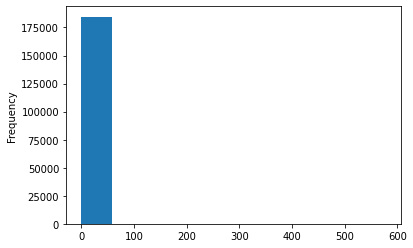

In [18]:
numeric_df.favorite_count.plot(kind = 'hist')

In [19]:
zero_FC = df[df.favorite_count == 0]
zero_FC.shape

(107645, 13)

Around 107k tweets have zero likes

In [20]:
df_updated = df[df.favorite_count > 0]

In [21]:
df_updated.shape

(77096, 13)

In [22]:
df_updated.sort_values('favorite_count',ascending = False).head(1)

,tweet_id,user_id,created_at,screen_name,favorite_count,retweet_count,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
88051,88055,425118862,2021-01-19 16:34:03,KitchLibrary,578.0,142.0,None,False,False,False,False,Kitchener Public Library,Its official No more overdue fines ever \n\nWe...


Tweet having highest likes was tweeted by "KitchLibrary" twitter handle which was at 578 likes 

In [23]:
df_updated[df_updated.favorite_count>100].shape

(33, 13)

only 33 tweets have likes more than 100

In [24]:
org_profiles = pd.read_csv('/content/drive/MyDrive/[Data for Good] Social Media Datathon Challenge/organization_profiles.csv')

In [25]:
org_profiles.head()

,id,Organization Name,twitter_handle,screen_name,agency_catergory,followers_count,friends_count,location
0,0,Adults In Motion,@AIMkitchener,AIMkitchener,Disabilities,662,800,"Kitchener, Ontario"
1,1,African Family Revival Organization,@AFROKitchener,AFROKitchener,"Arts, Culture and Heritage",125,64,"Kitchener, Ontario"
2,2,Alzheimer Society of Waterloo Wellington,@alzsocww,alzsocww,Seniors,1376,432,"Waterloo Wellington, Ontario"
3,3,Big Brothers Big Sisters of Waterloo Region,@BBBSWR,BBBSWR,"Children, Youth and Family",2462,1551,Waterloo Region
4,4,Bridges to Belonging,@BtoBelonging,BtoBelonging,Disabilities,1432,1254,Waterloo Region


Merging organisation_profile data with tweets data on primary key screen_name with variable df_all

In [26]:
df_updated.head()

,tweet_id,user_id,created_at,screen_name,favorite_count,retweet_count,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
0,0,885747516,2021-02-26 17:59:51,AIMkitchener,2.0,0.0,None,False,False,False,False,Adults In Motion,What will your garden look like this year \n...
1,1,885747516,2021-02-24 19:34:45,AIMkitchener,1.0,0.0,None,False,False,False,False,Adults In Motion,Virtual connecting is not the next big thing i...
2,2,885747516,2021-02-15 18:14:22,AIMkitchener,1.0,0.0,None,False,False,False,False,Adults In Motion,“Treat your friends like family and your famil...
3,3,885747516,2021-02-01 17:54:56,AIMkitchener,1.0,0.0,"['VirtualHug', 'SpreadKindness', 'SpreadLove']",False,False,False,False,Adults In Motion,Sending virtual Love Squeezes to anyone who n...
4,4,885747516,2021-01-15 18:40:36,AIMkitchener,1.0,0.0,None,True,False,False,False,Adults In Motion,How are YOU getting active and outdoors Tell u...


In [27]:
df_all = df_updated.merge(org_profiles,on='screen_name',how='inner')

In [28]:
df_all.corr()

,tweet_id,user_id,favorite_count,retweet_count,id,followers_count,friends_count
tweet_id,1.000000,-0.000884,0.035667,0.033794,0.999061,0.239222,0.195157
user_id,-0.000884,1.000000,0.014803,0.007347,-0.002238,-0.153329,-0.134750
favorite_count,0.035667,0.014803,1.000000,0.613552,0.037204,0.101202,0.028142
retweet_count,0.033794,0.007347,0.613552,1.000000,0.032839,0.053378,0.045591
id,0.999061,-0.002238,0.037204,0.032839,1.000000,0.233775,0.188543
followers_count,0.239222,-0.153329,0.101202,0.053378,0.233775,1.000000,0.543141
friends_count,0.195157,-0.134750,0.028142,0.045591,0.188543,0.543141,1.000000


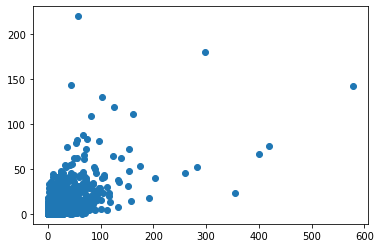

In [29]:
plt.scatter(df_all.favorite_count, df_all.retweet_count)
plt.show()

Majority of data spread in between 0 to 100 likes

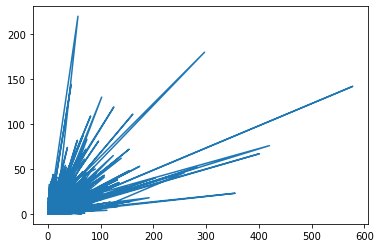

In [30]:
plt.plot(df_all.favorite_count,df_all.retweet_count)

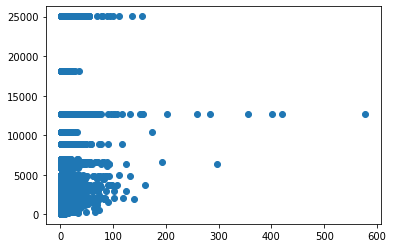

In [31]:
plt.scatter(df_all.favorite_count, df_all.followers_count)
plt.show()

{'boxes': [<matplotlib.lines.Line2D at 0x7fa3d0394f90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa3d039bfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa3d032a050>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa3d03a2ad0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa3d039b550>,
  <matplotlib.lines.Line2D at 0x7fa3d039ba90>]}

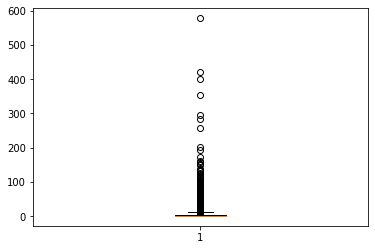

In [32]:
plt.boxplot(df_all.favorite_count)

In [33]:
a100 = df_all[df_all['favorite_count']>100]

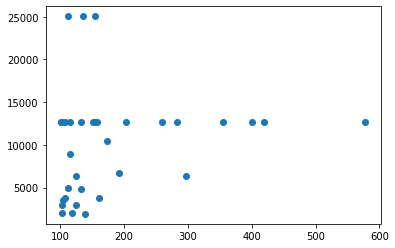

In [34]:
plt.scatter(a100.favorite_count, a100.followers_count)
plt.show()

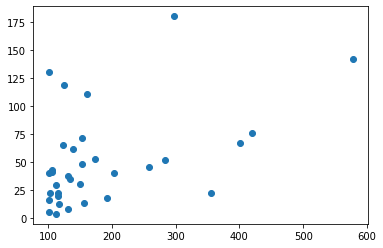

In [35]:
plt.scatter(a100.favorite_count, a100.retweet_count)
plt.show()

failed to quantify relationship between between followers_count, retweet_count, favorite_count

In [36]:
df_all.sort_values(by = 'favorite_count', ascending= False).head()

,tweet_id,user_id,created_at,screen_name,favorite_count,retweet_count,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name_x,text_clean,id,Organization Name_y,twitter_handle,agency_catergory,followers_count,friends_count,location
37696,88055,425118862,2021-01-19 16:34:03,KitchLibrary,578.0,142.0,None,False,False,False,False,Kitchener Public Library,Its official No more overdue fines ever \n\nWe...,40,Kitchener Public Library,@KitchLibrary,Library and Research,12630,3035,"Kitchener, Ontario, Canada"
38486,89115,425118862,2020-03-22 18:01:04,KitchLibrary,420.0,76.0,['kwawesome'],False,True,False,False,Kitchener Public Library,Thank you to everyone who reached out to us ab...,40,Kitchener Public Library,@KitchLibrary,Library and Research,12630,3035,"Kitchener, Ontario, Canada"
38820,89566,425118862,2019-11-04 14:51:57,KitchLibrary,401.0,67.0,None,False,False,False,False,Kitchener Public Library,Access to menstrual products just got a little...,40,Kitchener Public Library,@KitchLibrary,Library and Research,12630,3035,"Kitchener, Ontario, Canada"
37726,88093,425118862,2021-01-11 15:45:09,KitchLibrary,355.0,23.0,None,False,False,False,False,Kitchener Public Library,Be careful what you wish for \n\nPictured 85 i...,40,Kitchener Public Library,@KitchLibrary,Library and Research,12630,3035,"Kitchener, Ontario, Canada"
33136,79267,229574255,2019-02-27 12:01:37,KidsAbility,297.0,180.0,None,False,False,False,False,KidsAbility Centre for Child Development,With bullying in schools workplaces homes and ...,35,KidsAbility Centre for Child Development,@KidsAbility,Disabilities,6406,2277,Ontario


In [ ]:
df_all.to_excel('ready..xlsx')

In [38]:
from google.colab import files
files.download("ready..xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Summery and conclusion

1. Tweet having highest likes was tweeted by "KitchLibrary" twitter handle which was at 578 likes

2. only 33 tweets have likes more than 100

3. Majority of data spread in between 0 to 100 likes

4. failed to quantify relationship between between followers_count, retweet_count, favorite_count